# Linear Regression: Film Revenue Voorspellen

## 1. Introductie
Om de revenue te kunnen voorspellen, gebruiken we een lineaire regressie model. dat is een fundamentele statistische methode die de relatie tussen een afhankelijke variabele (Revenue) en één of meer onafhankelijke variabelen (features) modelleert.

### doelen
- laad de clean dataset
- we doen een Exploratory Data Analysis (EDA) om de feature correlaties te begrijpen
- Trainen een Linear Regression model.
- Evalueren het model's performance op basis van  RMSE en $R^2$.
- Visualizeren de resultaten om de nauwkeurigheid van het model te evalueren.

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

## 2. Laad Data
We laden het `movies_cleaned.csv` bestand uit de `output` map.
Deze dataset heeft al een cleaning ondergaan.

In [40]:
DATA_PATH = os.path.join("output", "movies_cleaned.csv")

# Load Dataset
os.path.exists(DATA_PATH)
df = pd.read_csv(DATA_PATH)
print(f"Successfully loaded data from {DATA_PATH}")

# Display first rows
df.head()

Successfully loaded data from output\movies_cleaned.csv


,id,original_language,origin_country,release_date,genre_names,production_company_names,budget,revenue,runtime,vote_average,vote_count,weighted_vote,genre_numeric,country_hash,original_language_numeric
0,183599,en,['GB'],1900-01-01,"['Crime', 'Thriller', 'Comedy']",['Robert W. Paul'],3202.457428,2048.373283,2,4.0,3,3.162890,65560,-2496249541690252953,35
1,183568,en,"['GB', 'US']",1900-01-01,['History'],['Robert W. Paul'],4626.630247,3526.674811,2,4.0,1,2.744336,512,-4183168635112124214,35
2,811141,en,['GB'],1900-01-01,[],[],3939.446826,2991.112535,2,4.0,1,2.744336,0,-2496249541690252953,35
3,119974,fr,['FR'],1900-01-01,"['Science Fiction', 'Horror', 'Comedy']",['Gaumont'],1455.925201,924.420105,2,4.9,22,4.591094,17416,3627348244984653200,45
4,188399,en,['GB'],1900-01-01,['Documentary'],['Mitchell & Kenyon'],4630.663425,4478.154016,3,5.0,3,3.662890,32,-2496249541690252953,35


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333686 entries, 0 to 333685
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         333686 non-null  int64  
 1   original_language          333686 non-null  object 
 2   origin_country             333686 non-null  object 
 3   release_date               333686 non-null  object 
 4   genre_names                333686 non-null  object 
 5   production_company_names   333686 non-null  object 
 6   budget                     333686 non-null  float64
 7   revenue                    333686 non-null  float64
 8   runtime                    333686 non-null  int64  
 9   vote_average               333686 non-null  float64
 10  vote_count                 333686 non-null  int64  
 11  weighted_vote              333686 non-null  float64
 12  genre_numeric              333686 non-null  int64  
 13  country_hash               33

## 3. Exploratory Data Analysis (EDA)

Voordat we gaan trainen, controleren we de correlatie tussen de features om te bepalen welke het meest relevant zijn voor het voorspellen van de **Revenue**.

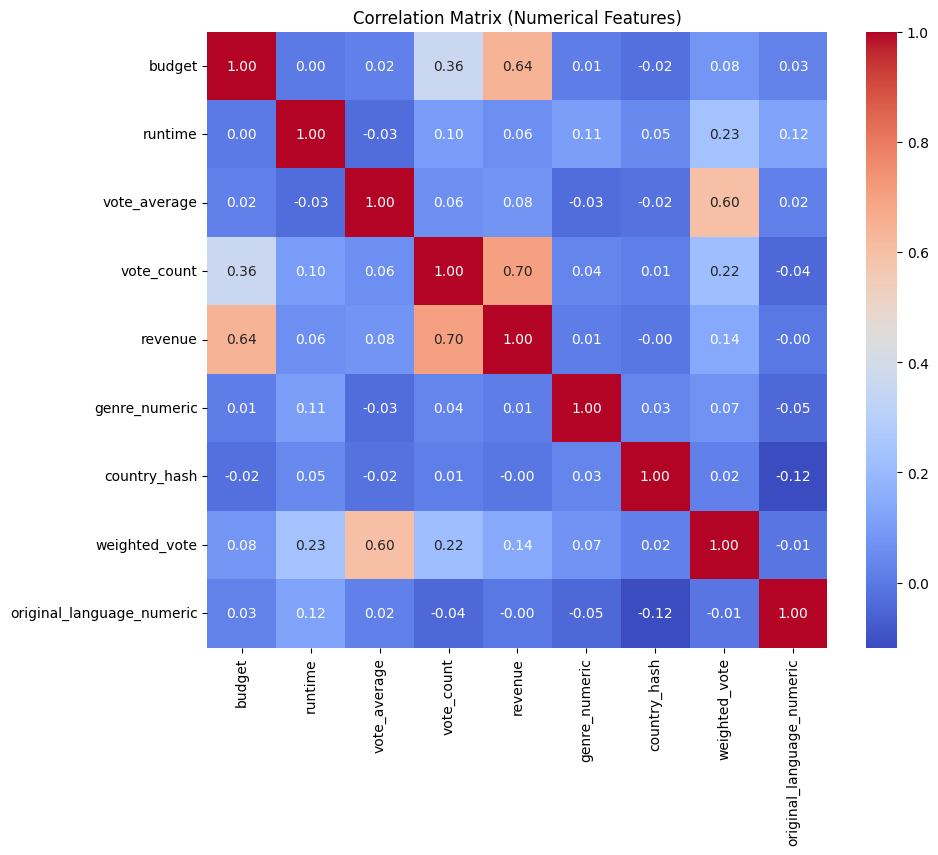

In [42]:
numerical_cols = ['budget', 'runtime', 'vote_average', 'vote_count', 'revenue', 'genre_numeric', 'country_hash', 'weighted_vote', 'original_language_numeric']
# Check intersection with actual columns
cols_to_plot = [c for c in numerical_cols if c in df.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = df[cols_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

## 4. Model Training

We splitsen de gegevens op in trainings- en testsets (80/20 split) en trainen een lineair regressiemodel.

Voor dit lineaire regressiemodel richten we ons op continue numerieke kenmerken die een geldige lineaire relatie hebben, met name:
- `budget`
- `runtime`
- `vote_average` / `vote_count` 

In [43]:
# Define Target and Features
TARGET = 'revenue'

# Select Features (excluding problematic hash/numeric columns)
potential_features = ['budget', 'runtime', 'vote_average', 'vote_count']
features = [col for col in potential_features if col in df.columns]

print(f"Target Variable: {TARGET}")
print(f"Feature Variables: {features}")

X = df[features]
y = df[TARGET]

# Check for missing values
print(f"\nMissing values in features:\n{X.isnull().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Handle missing values
# Option 1: Drop rows with any missing values
data_clean = pd.concat([X, y], axis=1).dropna()
print(f"\nOriginal dataset size: {len(df)}")
print(f"Dataset size after dropna: {len(data_clean)}")
print(f"Rows removed: {len(df) - len(data_clean)}")

X = data_clean[features]
y = data_clean[TARGET]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Verify no NaN values remain
assert not X_train.isnull().any().any(), "X_train contains NaN values"
assert not y_train.isnull().any(), "y_train contains NaN values"

# Initialize and train the model
import time
start_time = time.time()

model = LinearRegression()
model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.4f} seconds")

print(f"\nModel intercept: {model.intercept_:,.2f}")
print("Model coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:,.4f}")

Target Variable: revenue
Feature Variables: ['budget', 'runtime', 'vote_average', 'vote_count']

Missing values in features:
budget          0
runtime         0
vote_average    0
vote_count      0
dtype: int64
Missing values in target: 0

Original dataset size: 333686
Dataset size after dropna: 333686
Rows removed: 0

Training set size: 266948
Test set size: 66738

Training completed in 0.0259 seconds

Model intercept: -5,244,177.58
Model coefficients:
  budget: 1.0697
  runtime: 5,884.1580
  vote_average: 629,675.7399
  vote_count: 26,895.3875


In [44]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")
print(f"Intercept: {model.intercept_:,.2f}")
print("Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"  {feat}: {coef:,.4f}")

Model trained successfully.
Intercept: -5,244,177.58
Coefficients:
  budget: 1.0697
  runtime: 5,884.1580
  vote_average: 629,675.7399
  vote_count: 26,895.3875


## 5. Modelevaluatie

We evalueren het model met:
- **RMSE (Root Mean Squared Error)**: Meet de gemiddelde omvang van de fout.
- **$R^2$ Score**: Geeft het aandeel van de variantie van de afhankelijke variabele weer dat verklaard wordt door de onafhankelijke variabelen.

In [45]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 17,699,528.27
R2 Score: 0.7072


## 6. Visualisatie

Door de werkelijke waarden te visualiseren en de voorspelde waarden te vergelijken, kunnen we beter begrijpen waar het model goed presteert en waar het afwijkt.

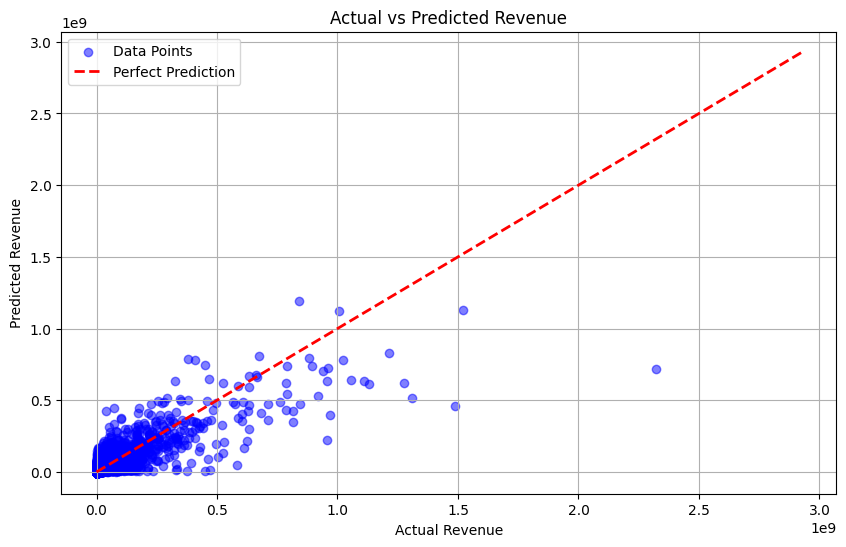

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()

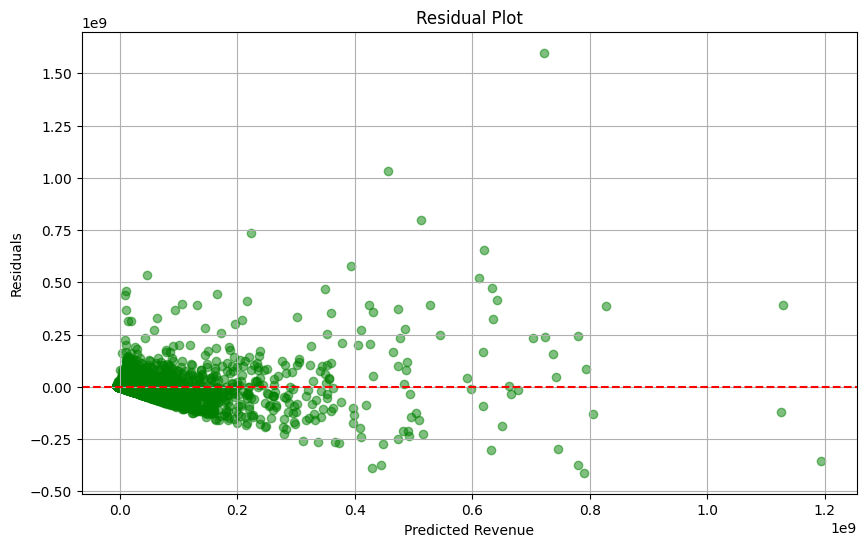

In [47]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

## 7. Conclusion

Het lineaire regressiemodel legt een aanzienlijk deel van de onderliggende trends die de revenue beïnvloeden, succesvol vast.

*   **Key Drivers:** De positieve coëfficiënten (waargenomen in de analyse) voor`budget` en `vote_count` bevestigen dat hogere investeringen en een grotere betrokkenheid van het publiek (populariteit) de sterkste voorspellers zijn van hoge inkomsten.
*   **Beperkingen:** Hoewel een verklarende kracht van 71% goed is, blijft er variantie (~29%) onverklaard. Dit komt waarschijnlijk door niet-lineaire verbanden, niet-gemeten factoren (zoals de intensiteit van marketinguitgaven, concurrentie op het gebied van releasedatum of de aantrekkingskracht van sterren) en de inherente onvoorspelbaarheid van virale hits of onverwachte flops.

